# Описание данных

Файлы:

## **olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей**

customer_id — позаказный идентификатор пользователя

customer_unique_id  —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

## **olist_orders_dataset.csv —  таблица заказов**

order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

## **olist_order_items_dataset.csv —  товарные позиции, входящие в заказы**

order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

### **Уникальные статусы заказов в таблице olist_orders_dataset:**

created —  создан

approved —  подтверждён

invoiced —  выставлен счёт

processing —  в процессе сборки заказа

shipped —  отгружен со склада

delivered —  доставлен пользователю

unavailable —  недоступен

canceled —  отменён

## Разведочный анализ данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
# Откроем все датасеты, при импорте сразу преобразуем временные колонки к правильному типу данных
customers_df = pd.read_csv('C:/Users/iamba/Downloads/olist_customers_dataset.csv')
orders_df = pd.read_csv('C:/Users/iamba/Downloads/olist_orders_dataset.csv', \
                        parse_dates=['order_purchase_timestamp', 'order_approved_at', \
                        'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
items_df = pd.read_csv('C:/Users/iamba/Downloads/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [14]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [15]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [16]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
#Убедимся в том, что все данные имеют правильный тип
customers_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [19]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [20]:
items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [26]:
#Проверим наши данные на наличие дублей
customers_df.duplicated().sum()

0

In [27]:
orders_df.duplicated().sum()

0

In [28]:
items_df.duplicated().sum()

0

In [29]:
#Проверка на пропуски
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [31]:
#Здесь видим пропуски, вероятно, с заказами что-то произошло и дальше они не логировались
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [32]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### С нашими данными все впорядке, можем приступить к выполнению поставленных задач

## Сколько у нас пользователей, которые совершили покупку только один раз?

Чтобы ответить на вопрос, необходимо сформулировать, что мы будем считать покупкой

Покупкой будем считать те записи, в которых товар перешел в пользование покупателем, т.е. со статусом delivered

Нам нужно замерджить два датафрейма - users_df, содержащего в себе информацию о пользователях, и  orders_df с информацией о заказах.

In [33]:
orders_by_customers_df = customers_df.merge(orders_df, on='customer_id')

In [34]:
orders_by_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [35]:
users_with_only_one_order = orders_by_customers_df.query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'number_of_orders'}) \
    .query('number_of_orders == 1')

In [36]:
number_of_customers_with_only_one_order = users_with_only_one_order.shape[0]

In [37]:
print(f'Число покупателей, совершивших только одну покупку, составляет {number_of_customers_with_only_one_order}.')

Число покупателей, совершивших только одну покупку, составляет 90557.


## Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Для начала определим, сколько заказов в среднем не доставляется ежемесячно

Недоставленными будем считать заказы со статусом canceled и unavailable 

In [39]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [42]:
not_delivered = orders_df.query('order_status == "canceled" | order_status == "unavailable"') \
    .groupby('order_purchase_timestamp', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'not_delivered'})

In [43]:
not_delivered = not_delivered.sort_values('order_purchase_timestamp')

In [44]:
not_delivered = not_delivered.set_index('order_purchase_timestamp')

In [46]:
not_delivered = not_delivered.resample(rule='M').sum()
not_delivered

,not_delivered
order_purchase_timestamp,
2016-09-30,2
2016-10-31,31
2016-11-30,0
2016-12-31,0
2017-01-31,13
2017-02-28,62
2017-03-31,65
2017-04-30,27
2017-05-31,60


In [50]:
print(f'В среднем ежемесячно не доставляется {np.round(np.mean(not_delivered.not_delivered))} заказов.')
print(f'Всего недоставленных заказов {not_delivered.not_delivered.sum()}')

В среднем ежемесячно не доставляется 47.0 заказов.
Всего недоставленных заказов 1234


Теперь постараемся выяснить причины отмены заказов

Как выяснилось на этапе EDA в таблице с заказами есть пропуски в колонках order_approved_at, order_delivered_carrier_date, order_delivered_customer_date. Поработаем с этими пропусками

Первая причина - у заказа просто не прошла оплата, проверим сколько было таких заказов.

In [60]:
not_aproved_orders = orders_df.query('(order_status == "canceled" | order_status == "unavailable") & order_approved_at == "NaT"')
print(f'Количество недоставленных заказов по причине не подтвержденной оплаты составило {not_aproved_orders.shape[0]}')

Количество недоставленных заказов по причине не подтвержденной оплаты составило 141


Следующие пропуски лежат в столбце с датой передачи в логистическую службу, проверим и это.

In [64]:
not_delivery_carrier = orders_df.query('((order_status == "canceled" | order_status == "unavailable") & order_approved_at != "NaT") & order_delivered_carrier_date == "NaT"')
print(f'Количество заказов не переданных в логистическую службу составило {not_delivery_carrier.shape[0]}')

Количество заказов не переданных в логистическую службу составило 1018


В этой причине разобраться сложнее, т.к. не хватает данных для точного определения первоисточника проблемы

Ясно одно, заказ не передали в логистическую службу для дальнейшей доставки до пользователя

In [68]:
not_delivered_to_customer = orders_df.query('(order_status == "canceled" | order_status == "unavailable") & order_approved_at != "NaT" & order_delivered_carrier_date != "NaT"')
not_delivered_to_customer.shape

(75, 8)

75 заказов были просто не доставлены покупателю, вероятно, они потерялись по пути, либо были отменены на пути к дому кастомера по неизвестным для нас причинам.

Из-за нехватки данных можем выделить 3 довольно обобщенных причины:

1 - заказ не апрувнулся (не прошла оплата, покупатель передумал и т.д.)

2 - не передали в логистику

3 - логисты не доставили заказ до получателя

In [69]:
num_of_not_delivered_orders = [not_aproved_orders.shape[0], not_delivery_carrier.shape[0], not_delivered_to_customer.shape[0]]
reasons_of_cancelling_orders = ['Order not aproved', 'Not transferred to logistics', 'Not delivered to customer']

<function matplotlib.pyplot.show(close=None, block=None)>

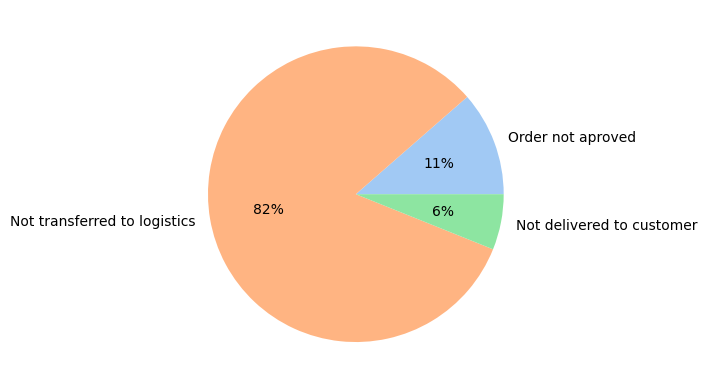

In [70]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(num_of_not_delivered_orders, labels = reasons_of_cancelling_orders, colors = colors, autopct='%.0f%%')
plt.show